# Project 1 - Udacity DSND

For this project the following libraries have being imported

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

I have selected the Seattle AirBNB Dataset (https://www.kaggle.com/airbnb/seattle/data?select=listings.csv)

In [2]:
# Gathering data
df = pd.read_csv("listings.csv")

In [4]:
# Overview dataset
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
#List of Columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

**Missing Data: **
    
The dataset indeed presents missing data. I have decided to not proceed with data cleaning since the data take for this notebook contains all the data without missing data. Based on the following there are several missing data but this does not impact my questions so I have left these unchanged.

In [11]:
df.count().sort_values(ascending=True)

license                              0
square_feet                         97
monthly_price                     1517
security_deposit                  1866
weekly_price                      2009
notes                             2212
neighborhood_overview             2786
cleaning_fee                      2788
transit                           2884
host_about                        2959
host_acceptance_rate              3045
review_scores_checkin             3160
review_scores_accuracy            3160
review_scores_value               3162
review_scores_location            3163
review_scores_cleanliness         3165
review_scores_communication       3167
review_scores_rating              3171
last_review                       3191
first_review                      3191
reviews_per_month                 3191
space                             3249
host_response_time                3295
host_response_rate                3295
neighbourhood                     3402
xl_picture_url           

### Question 1

What is the proportion of room_type per property_type?

As we can see below from the plot, there are 3 categories of room_type:
* Entire home/apt
* Private room
* Shared room

On the other hand, there are 16 different property_type, however for this exercise I have selected the top 5:
* House
* Apartment
* Townhouse
* Condominium
* Loft

Following observation from the plot:
* **House** (property_type) tend to have similar percentages of **Entire home/apt** (room type) and **Private room**(room type)
* **Apartment** (property_type) has greater percentage of **Entire home/apt** (room type) compare to **Private room**(room type)
* **Townhouse** (property_type) has greater percentage of **Private room** (room type) compare to **Entire home/apt**(room type)
* **Condominium** (property_type) has greater percentage of **Entire home/apt** (room type) compare to **Private room**(room type)

Regarding **Shared Room**, there is a low percentage so it is not useful to discuss this

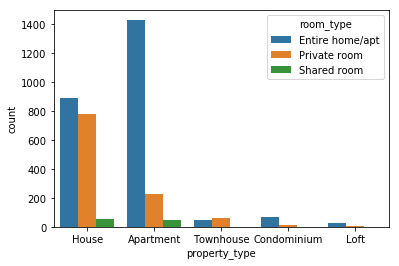

In [12]:
# Counting instances in order 
order = df['property_type'].value_counts(ascending=False).index[:5]
#Plot
sns.countplot(x="property_type", hue="room_type",  data=df, order=order)
#Plot Show in notebook
plt.show()

### Question 2

Who is the host in the dataset which posses the highest number of properties?

Steps and answer:
* I have found below the number of properties per host
* Got the first and highest host possessing greater number of properties (8534462)
* Filtered data on host_id = 8534462
* Identified and reported properties the host is placing on AirBnB
* Her name is Daniela and owns 46 properties.


In [14]:
# Count of distinct host_id
df['host_id'].value_counts()

8534462     46
4962900     39
1243056     37
430709      36
3074414     34
74305       33
26967583    21
7354306     18
42537846    16
1623580     12
658155      12
2911360     11
862329      11
754810      10
31148752    10
50893       10
14980831     9
5325329      9
4411144      9
1787819      8
10558142     7
5820099      7
1121532      7
6372203      6
22764472     6
5177328      6
50550045     6
12796487     6
2409388      5
32807985     5
            ..
45917623     1
41319913     1
17928378     1
21149225     1
42273230     1
23372237     1
45437387     1
9565783      1
34605512     1
295367       1
2161126      1
9060841      1
27761130     1
15512043     1
205325       1
36706828     1
7182858      1
27129222     1
13042181     1
1845764      1
13959773     1
15436286     1
2294267      1
33931765     1
36882932     1
38090170     1
11839982     1
668141       1
1691632      1
10420224     1
Name: host_id, Length: 2751, dtype: int64

In [16]:
# Filter on highest host_id having greater number of properies compare to the other hosts
df.loc[df['host_id'] == 8534462][['host_id', 'name', 'host_name', 'street', 'property_type']]

,host_id,name,host_name,street,property_type
1077,8534462,Pike's Place. 100 Walkscore,Daniela,"Union Street, Seattle, WA 98101, United States",Apartment
1149,8534462,Westlake Ave Downtown Condos 1BD,Daniela,"Westlake Avenue North, Seattle, WA 98109, Unit...",Apartment
1152,8534462,Westlake Ave Downtown Condos 1BD 4,Daniela,"Westlake Avenue North, Seattle, WA 98109, Unit...",Apartment
1155,8534462,Westlake Ave Downtown Condos 1BD 2,Daniela,"Westlake Avenue North, Seattle, WA 98109, Unit...",Apartment
1159,8534462,Westlake Ave Downtown Condos 1BD 3,Daniela,"Westlake Avenue North, Seattle, WA 98109, Unit...",Apartment
1230,8534462,100 Walk Score - Lux 2Bed,Daniela,"Terry Avenue, Seattle, WA 98101, United States",Condominium
1237,8534462,Great Location. 98 Walkscore 2,Daniela,"Bell Street, Seattle, WA 98121, United States",Apartment
1238,8534462,Belltown Condos 1BD 4,Daniela,"Cedar Street, Seattle, WA 98121, United States",Apartment
1278,8534462,Downtown 2Bed Western Sunset Views,Daniela,"1st Avenue, Seattle, WA 98121, United States",Apartment
1298,8534462,Sky High Water View. 99 Walkscore,Daniela,"Stewart Street, Seattle, WA 98101, United States",Condominium


### Question 3

Which properti on the selected database has the worst rating?

Steps and Answer:
* Create copy of intrested columns
* Dropped NA values
* Plotting BoxPlot showing distribution of values
* Identified one properfity having rating about 20
* Sorted ascending by rating column and identifed the worst rating and id of the property
* Filtered properti id on original dataframe
* The property_id on dataset with the worst rating is 9183838

In [26]:
# removing missing data from review_scores_rating
reviewdf = df[['id','review_scores_rating']].copy()
reviewdf.dropna(inplace=True)

In [27]:
#Conunting missing values
reviewdf.isnull().sum().sum()

0

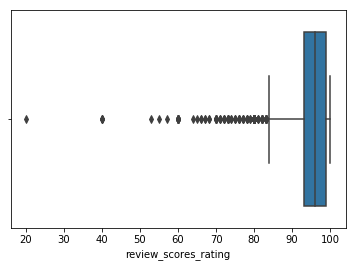

In [23]:
sns.boxplot(x=reviewdf['review_scores_rating'])
plt.show()

In [28]:
reviewdf.sort_values(by=['review_scores_rating']).head()

,id,review_scores_rating
1222,9183838,20.0
3148,5639238,40.0
2320,8474294,40.0
1162,9151865,40.0
1666,9151374,40.0


In [30]:
df.loc[df['id']==9183838]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1222,9183838,https://www.airbnb.com/rooms/9183838,20160104002432,2016-01-04,Belltown / Downtown Apartment,This 700 square foot apartment is close to res...,"The Space This is a 700 square foot, one bedro...",This 700 square foot apartment is close to res...,none,NaN,...,2.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.0
